In [1]:
import pandas as pd

In [2]:
cases = pd.read_csv('2020-04-17.csv', delimiter = ',', header=None).drop([0,2,3], axis=1).drop([0])
cases.columns = [n for n in range(len(cases.columns))]
for n in range(len(cases.columns))[1:]:
    cases[n] = pd.to_numeric(cases[n])
cases

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
1,Afghanistan,0,0,0,0,0,0,0,0,0,...,423,444,484,521,555,607,665,714,784,840
2,Albania,0,0,0,0,0,0,0,0,0,...,383,400,409,416,433,446,467,475,494,518
3,Algeria,0,0,0,0,0,0,0,0,0,...,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268
4,Andorra,0,0,0,0,0,0,0,0,0,...,545,564,583,601,601,638,646,659,673,673
5,Angola,0,0,0,0,0,0,0,0,0,...,17,19,19,19,19,19,19,19,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,France,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
261,South Sudan,0,0,0,0,0,0,0,0,0,...,2,2,3,4,4,4,4,4,4,4
262,Western Sahara,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,6,6,6,6,6
263,Sao Tome and Principe,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


In [3]:
# Agregate by country

cases_by_country = cases.groupby(cases[0]).agg('sum')
cases_by_country

,1,2,3,4,5,6,7,8,9,10,...,77,78,79,80,81,82,83,84,85,86
0,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,423,444,484,521,555,607,665,714,784,840
Albania,0,0,0,0,0,0,0,0,0,0,...,383,400,409,416,433,446,467,475,494,518
Algeria,0,0,0,0,0,0,0,0,0,0,...,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268
Andorra,0,0,0,0,0,0,0,0,0,0,...,545,564,583,601,601,638,646,659,673,673
Angola,0,0,0,0,0,0,0,0,0,0,...,17,19,19,19,19,19,19,19,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,261,263,263,267,268,290,308,308,374,374
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,6,6,6,6,6
Yemen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1


In [4]:
"""
Get all countries and shift from outbrake day 0 for each country
"""
single_dfs = []
for i in range(len(cases_by_country.index)):
    single_row = cases_by_country.iloc[[i]]
    zero_cols = [col for col, val in single_row.sum().iteritems() if val < 100]
    single_row_dropped = single_row.drop(zero_cols, axis=1)
    single_row_dropped.columns = range(single_row_dropped.columns.size)
    single_dfs.append(single_row_dropped)

shifted_df = pd.concat(single_dfs)
shifted_df_transp = shifted_df.T

In [5]:
countries = ['Brazil', 'United Kingdom', 'Iran', 'Italy', 'Spain', 'US', 'Korea, South', 'Australia']
shifted_df_transp = shifted_df_transp[countries]
shifted_df_transp[:30]

,Brazil,United Kingdom,Iran,Italy,Spain,US,"Korea, South",Australia
0,151.0,116.0,139.0,155.0,120.0,118.0,104.0,107.0
1,151.0,164.0,245.0,229.0,165.0,149.0,204.0,128.0
2,162.0,207.0,388.0,322.0,222.0,217.0,433.0,128.0
3,200.0,274.0,593.0,453.0,259.0,262.0,602.0,200.0
4,321.0,322.0,978.0,655.0,400.0,402.0,833.0,250.0
5,372.0,384.0,1501.0,888.0,500.0,518.0,977.0,297.0
6,621.0,459.0,2336.0,1128.0,673.0,583.0,1261.0,377.0
7,793.0,459.0,2922.0,1694.0,1073.0,959.0,1766.0,452.0
8,1021.0,802.0,3513.0,2036.0,1695.0,1281.0,2337.0,568.0
9,1546.0,1144.0,4747.0,2502.0,2277.0,1663.0,3150.0,681.0


In [6]:
"""
Normalize by population
"""
population = {
    'Brazil': 212559417,
    'United Kingdom': 67782983,
    'China': 1439323776,
    'Iran': 83992949,
    'Italy': 83992949,
    'Spain': 46755933,
    'US': 331002651,
    'Korea, South': 51260292, 
    'Australia': 25439493
}

for col in shifted_df_transp:
    shifted_df_transp[col] = shifted_df_transp[col]*1000000/population[col]

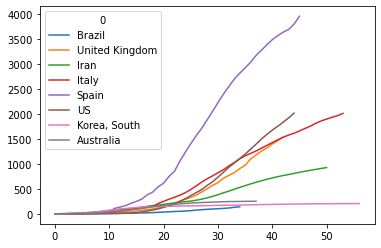

In [7]:
shifted_df_transp.plot()

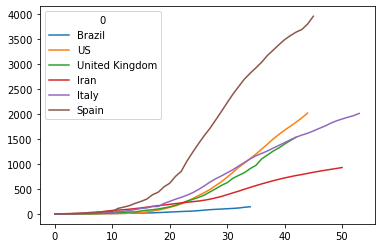

In [8]:
shifted_df_transp[['Brazil', 'US', 'United Kingdom', 'Iran', 'Italy', 'Spain']].plot()

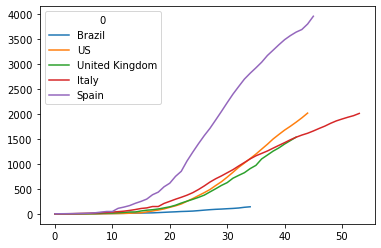

In [9]:
shifted_df_transp[['Brazil', 'US', 'United Kingdom', 'Italy', 'Spain']].plot()

Text(0.5, 0, 'days')

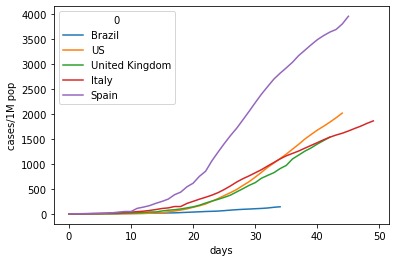

In [10]:
plot = shifted_df_transp[['Brazil', 'US', 'United Kingdom', 'Italy', 'Spain']][:50].plot()
plot.set_ylabel('cases/1M pop')
plot.set_xlabel('days')

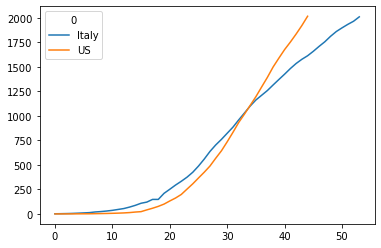

In [11]:
shifted_df_transp[['Italy', 'US']].plot()

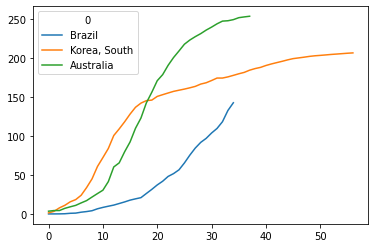

In [12]:
shifted_df_transp[['Brazil', 'Korea, South', 'Australia']].plot()